In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# pandas - used for data manipulation
# matplotlib - used for graphs and charts
# seaborn - used for graphs that more interactive

# 1. Data Import

In [116]:
df = pd.read_csv("imdb_movies.csv")
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


# 2. Data Overveiw and Basic Explanation

In [117]:
df.shape

(10178, 12)

In [118]:
df.columns

# The dataset has 10178 rows
# The dataset has 12 columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

### Use .info() to understand the data types and missing values. What potential issues can you spot?

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [120]:
# The date_x col is in object which needs to be converted to datetime

### Describe the main characteristics of each column using .describe(). What can you infer from the mean, median, and distribution of numerical columns ?


In [121]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


# 3. Data Cleaning



# Handling Missing Values

### Which columns contain missing values? How would you handle them ?

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


### Are there any columns where data types need conversion (e.g., date, ratings)? Explain your decision.

In [123]:
# Converting date_x to datetime format

df["date_x"] = pd.to_datetime(df["date_x"])

In [124]:
date_sort = df["date_x"].sort_values(ascending = False)
date_sort

1317   2023-12-31
7852   2023-10-06
9224   2023-09-29
3583   2023-09-22
801    2023-09-08
          ...    
7715   1920-02-27
9525   1915-02-08
9526   1915-02-08
7428   1907-06-20
558    1903-05-15
Name: date_x, Length: 10178, dtype: datetime64[ns]

In [125]:
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [126]:
missing_rows = df[df.isnull().any(axis = 1)]
missing_rows

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
148,Orgasm Inc: The Story of OneTaste,2022-11-05,64.0,Documentary,A sexual wellness company gains fame and follo...,NaN,Orgasm Inc: The Story of OneTaste,Released,English,77400000.0,431611098.0,US
206,Legend of the Galactic Heroes: Die Neue These ...,2022-09-30,61.0,Animation,The story focuses on the exploits of rivals Re...,NaN,銀河英雄伝説 Die Neue These 策謀 1,Released,Japanese,138000000.0,337725907.8,JP
305,Housewife Sex Slaves: Hatano Yui,2015-01-09,0.0,NaN,We don't have an overview translated in Englis...,"Yui Hatano,",人妻性奴隷 波多野結衣,Released,Japanese,167540000.0,175269998.8,JP
649,Cuento de Primavera-A Spring Tale,2022-12-20,81.0,"Drama, Fantasy, Mystery",We don't have an overview translated in Englis...,NaN,Cuento de Primavera-A Spring Tale,Released,"Spanish, Castilian",77600000.0,827017257.2,US
938,Cat Pack: A PAW Patrol Exclusive Event,2022-06-24,74.0,"Animation, Family",When Mayor Humdinger transforms his robot cat ...,NaN,Cat Pack: A PAW Patrol Exclusive Event,Released,English,92800000.0,609222681.4,US
...,...,...,...,...,...,...,...,...,...,...,...,...
9750,Alice Under the Table,2015-10-15,61.0,Fantasy,We don't have an overview translated in Englis...,NaN,Alice Under the Table,Released,"Spanish, Castilian",170000000.0,295463225.0,ES
10011,Perfumed Garden,2000-06-03,53.0,NaN,"Imagine a world of pleasure, where passion is ...","Ivan Baccarat, Michael, Amy Lindsay, Lisa, Raj...",Perfumed Garden,Released,English,159000000.0,279278382.2,ID
10025,The Girl and the Wooden Horse Torture,1982-12-03,50.0,NaN,Nami is a masochistic high school student who ...,"Serina Nishikawa, Nami Tsuchiya, Waka Oda, , A...",団鬼六 少女木馬責め,Released,Japanese,163600000.0,812667214.2,JP
10076,The Shoga (Glass and Gas) Company,1990-09-07,37.0,NaN,"""I have not been very active as a social filmm...",NaN,Sherkat-e Shisheh va Gaz,Released,Persian,58670000.0,385960548.2,IR


In [127]:
# There are 126 rows of missing values, which is 1.24 % of the total rows removing these many rows will not hamper the data 
# hence i have decided to remove these many rows

missing_values = round(((126/10178) * 100),2)
missing_values

1.24

In [128]:
10178 - 126

10052

In [129]:
df = df.dropna()
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


# Checking for outliers

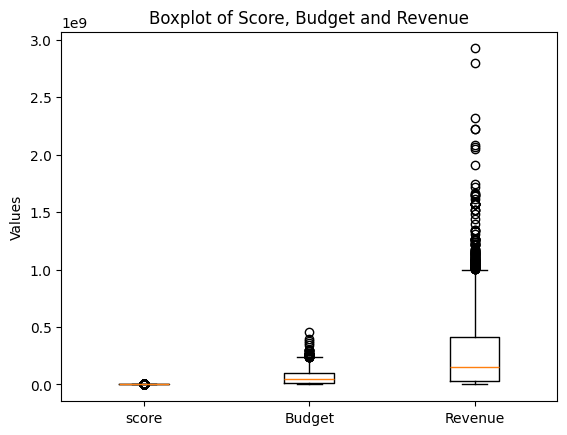

In [130]:
plt.boxplot([df["score"], df["budget_x"], df["revenue"]])
plt.xticks([1,2,3], ["score", "Budget", "Revenue"])
plt.title("Boxplot of Score, Budget and Revenue")
plt.ylabel("Values")
plt.show()

In [131]:
# In the above boxplots "Revenue" has more outliers

# 4. Univariate Analysis: Explore each column individually.

### What are the most common genres in the dataset? Use a bar chart to show their distribution ?

In [132]:
df["genre"]

0                                            Drama, Action
1                       Science Fiction, Adventure, Action
2            Animation, Adventure, Family, Fantasy, Comedy
3            Animation, Comedy, Family, Adventure, Fantasy
4                                                   Action
                               ...                        
10173                                                Drama
10174                                               Action
10175                             Drama, Thriller, Romance
10176    Action, Adventure, Science Fiction, Thriller, ...
10177                           Animation, Family, Fantasy
Name: genre, Length: 10052, dtype: object

In [133]:
# Drop missing values and spliting each individual genre
genre_series = df["genre"].dropna().str.split(",\s*")

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BINAY\AppData\Local\Temp\ipykernel_14356\924456061.py:2: SyntaxWarning: invalid escape sequence '\s'
  genre_series = df["genre"].dropna().str.split(",\s*")


In [134]:
# All the individual genres in a list
all_genres = [genre.strip() for sublist in genre_series for genre in sublist]

In [135]:
# Count for each genre
genre_counts = Counter(all_genres)
genre_counts

Counter({'Drama': 3807,
         'Comedy': 2940,
         'Action': 2750,
         'Thriller': 2605,
         'Adventure': 1888,
         'Romance': 1575,
         'Horror': 1552,
         'Animation': 1454,
         'Family': 1403,
         'Fantasy': 1375,
         'Crime': 1271,
         'Science Fiction': 1258,
         'Mystery': 860,
         'History': 422,
         'War': 281,
         'Music': 275,
         'TV Movie': 211,
         'Documentary': 199,
         'Western': 131})

In [136]:
# The most common genres of movies are "Drama", "Comedy", "Action", "Thriller".

In [137]:
# Creating a data frame out of all the genres and counting each of them.

genre_df = pd.DataFrame(genre_counts.items(), columns = ["Genre", "Count"]).sort_values(by = "Count", ascending = False)
genre_df

,Genre,Count
0,Drama,3807
7,Comedy,2940
1,Action,2750
8,Thriller,2605
3,Adventure,1888
15,Romance,1575
10,Horror,1552
4,Animation,1454
5,Family,1403
6,Fantasy,1375


C:\Users\BINAY\AppData\Local\Temp\ipykernel_14356\2682309159.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Genre", y = "Count", data = top_genres, palette = "viridis")


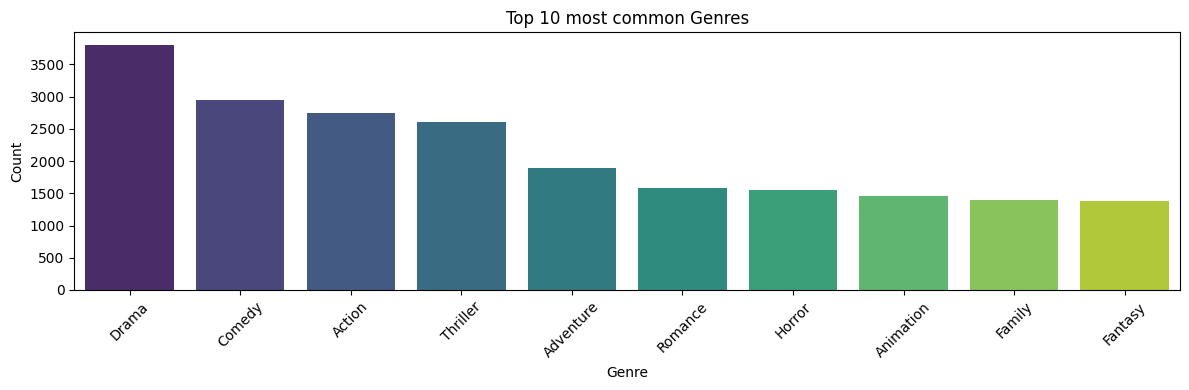

In [138]:
# Ploting a bar plot for top 10 most common genres

top_genres = genre_df.head(10)

plt.figure(figsize = (12,4))

sns.barplot(x = "Genre", y = "Count", data = top_genres, palette = "viridis")

plt.xticks(rotation = 45)
plt.title("Top 10 most common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 5. Bivariate Analysis: Explore relationships between two variables.

### How do ratings vary by genre? Use a boxplot to visualize the differences in ratings across genres.

In [139]:
# Here im trying to create a dataframe that contains each genre and the score assosiated with it

# keep both genre and score, drop missing values
df_genre_score = df[["genre", "score"]].dropna()

# spliting the "genre" col
df_genre_score["genre"] = df_genre_score["genre"].str.split(",\s*")

# Spliting the comma separated string values into single values as a individual genre
df_genre_score = df_genre_score.explode("genre")
df_genre_score["genre"] = df_genre_score["genre"].str.strip()

# Calculating average score by genres
avg_score_by_genre = df_genre_score.groupby("genre")["score"].mean().sort_values(ascending = False)
avg_score_by_genre

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BINAY\AppData\Local\Temp\ipykernel_14356\3346293591.py:7: SyntaxWarning: invalid escape sequence '\s'
  df_genre_score["genre"] = df_genre_score["genre"].str.split(",\s*")


genre
History            69.158768
War                69.099644
Animation          69.044704
Music              68.996364
Western            68.007634
Family             66.184604
Drama              65.982926
Fantasy            65.805091
Adventure          65.266419
Crime              65.129032
Documentary        65.120603
Mystery            64.413953
TV Movie           64.199052
Comedy             63.918367
Action             63.625091
Science Fiction    63.425278
Thriller           62.649520
Romance            62.644444
Horror             59.807990
Name: score, dtype: float64

In [140]:
avg_score_by_genre_df = pd.DataFrame(avg_score_by_genre.items(), columns = ["Genre", "Avg_Score"]).sort_values(by = "Avg_Score", ascending = False)
avg_score_by_genre_df

,Genre,Avg_Score
0,History,69.158768
1,War,69.099644
2,Animation,69.044704
3,Music,68.996364
4,Western,68.007634
5,Family,66.184604
6,Drama,65.982926
7,Fantasy,65.805091
8,Adventure,65.266419
9,Crime,65.129032


C:\Users\BINAY\AppData\Local\Temp\ipykernel_14356\3446008364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "genre", y = "score", data = df_genre_score, palette = "Set2")


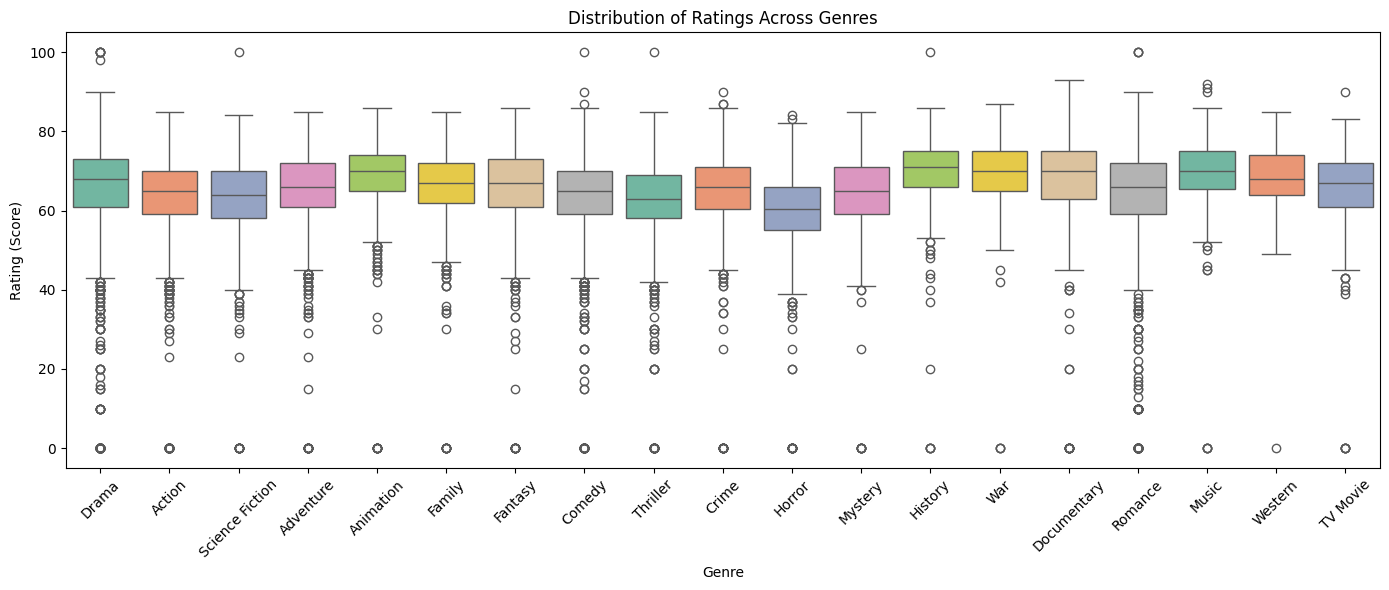

In [141]:
# Average rating across genres

plt.figure(figsize = (14, 6))
sns.boxplot(x = "genre", y = "score", data = df_genre_score, palette = "Set2")
plt.title("Distribution of Ratings Across Genres")
plt.xlabel("Genre")
plt.ylabel("Rating (Score)")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Is there a correlation between the score, budget and revenue? Create a scatter plot and calculate the correlation coefficient. What can you conclude?

In [142]:
df[["score", "budget_x", "revenue"]]

,score,budget_x,revenue
0,73.0,75000000.0,2.716167e+08
1,78.0,460000000.0,2.316795e+09
2,76.0,100000000.0,7.244590e+08
3,70.0,12300000.0,3.420000e+07
4,61.0,77000000.0,3.409420e+08
...,...,...,...
10173,73.0,7000000.0,9.353729e+06
10174,54.0,9145817.8,6.698361e+06
10175,61.0,21800000.0,2.299799e+07
10176,55.0,116000000.0,4.756613e+08


In [143]:
# corr_matrix score, budget, revenue

corr_matrix = df[["score", "budget_x", "revenue"]].corr()
corr_matrix

,score,budget_x,revenue
score,1.000000,-0.214374,0.090929
budget_x,-0.214374,1.000000,0.682766
revenue,0.090929,0.682766,1.000000


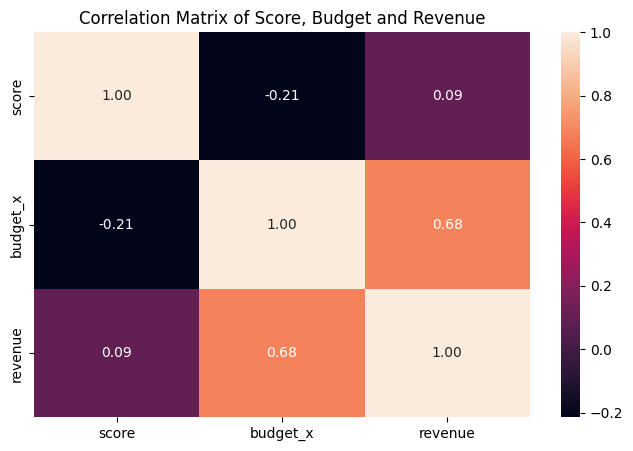

In [144]:
plt.figure(figsize = (8,5))
sns.heatmap(corr_matrix, annot = True, cmap = "rocket", fmt = ".2f")
plt.title("Correlation Matrix of Score, Budget and Revenue")
plt.show()

### Corr Findings

### Budget vs Revenue → Moderate Positive Correlation (0.68)
There’s a strong relationship between a movie’s budget and its revenue.

This suggests that higher-budget movies tend to earn more revenue, likely due to better production, marketing, star power, and wide releases.

### Score vs Budget → Weak Negative Correlation (-0.21)
There’s a slight inverse relationship between budget and IMDb score.

This may indicate that higher-budget films don't always get better ratings — possibly due to prioritizing spectacle over story or differing audience expectations.

### Score vs Revenue → Very Weak Positive Correlation (0.09)
Virtually no meaningful relationship between a movie's rating and how much money it makes.

This shows that popular or high-earning films are not always critically acclaimed, and vice versa.

### Summary:

Revenue is influenced by budget, but score is mostly independent of both.

Critics and audiences may appreciate low or mid-budget films, while blockbusters don’t guarantee high ratings.

Financial success and critical success are not strongly linked in the IMDb dataset.

# 6. Genre-Specific Analysis

### Which genre has the highest average rating? Calculate the average rating for each genre and plot the results.

In [145]:
# Here im trying to create a dataframe that contains each genre and the score assosiated with it

# keep both genre and score, drop missing values
df_genre_score = df[["genre", "score"]].dropna()

# spliting the "genre" col
df_genre_score["genre"] = df_genre_score["genre"].str.split(",\s*")

# Spliting the comma separated string values into single values as a individual genre
df_genre_score = df_genre_score.explode("genre")
df_genre_score["genre"] = df_genre_score["genre"].str.strip()

# Calculating average score by genres
avg_score_by_genre = df_genre_score.groupby("genre")["score"].mean().sort_values(ascending = False)

# Creating a table
avg_score_by_genre_df = pd.DataFrame(avg_score_by_genre.items(), columns = ["Genre", "Avg_Score"]).sort_values(by = "Avg_Score", ascending = False)
avg_score_by_genre_df

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BINAY\AppData\Local\Temp\ipykernel_14356\2266448609.py:7: SyntaxWarning: invalid escape sequence '\s'
  df_genre_score["genre"] = df_genre_score["genre"].str.split(",\s*")


,Genre,Avg_Score
0,History,69.158768
1,War,69.099644
2,Animation,69.044704
3,Music,68.996364
4,Western,68.007634
5,Family,66.184604
6,Drama,65.982926
7,Fantasy,65.805091
8,Adventure,65.266419
9,Crime,65.129032


In [146]:
# "History", "War", "Animation" have the highest average score 

### How does the popularity of genres vary over time ? Plot the number of movies released per genre each year.


In [147]:
# converting date_x to datetime formart
df["date_x"] = pd.to_datetime(df["date_x"])

# Extracting "year" from the date
df["year"] = df["date_x"].dt.year

In [148]:
# Calling "genre" and "year" droping na
genre_year_df = df[["genre", "year"]].dropna()

# spliting the "genre" col
genre_year_df["genre"] = genre_year_df["genre"].str.split(",\s*")

# Spliting the comma separated string values into single values as a individual genre
genre_year_df = genre_year_df.explode("genre")
genre_year_df["genre"] = genre_year_df["genre"].str.strip()

# Grouping and counting
genre_trend = genre_year_df.groupby(["year", "genre"]).size().reset_index(name = "count")

# Filtering top genres 
top_genres = genre_trend.groupby("genre")["count"].sum().nlargest(5).index
genre_trend_top = genre_trend[genre_trend["genre"].isin(top_genres)]

genre_trend_top

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BINAY\AppData\Local\Temp\ipykernel_14356\721480040.py:5: SyntaxWarning: invalid escape sequence '\s'
  genre_year_df["genre"] = genre_year_df["genre"].str.split(",\s*")


,year,genre,count
0,1903,Drama,1
2,1907,Adventure,1
4,1915,Drama,2
8,1920,Drama,1
10,1920,Thriller,1
...,...,...,...
1281,2023,Action,84
1282,2023,Adventure,47
1284,2023,Comedy,109
1287,2023,Drama,140


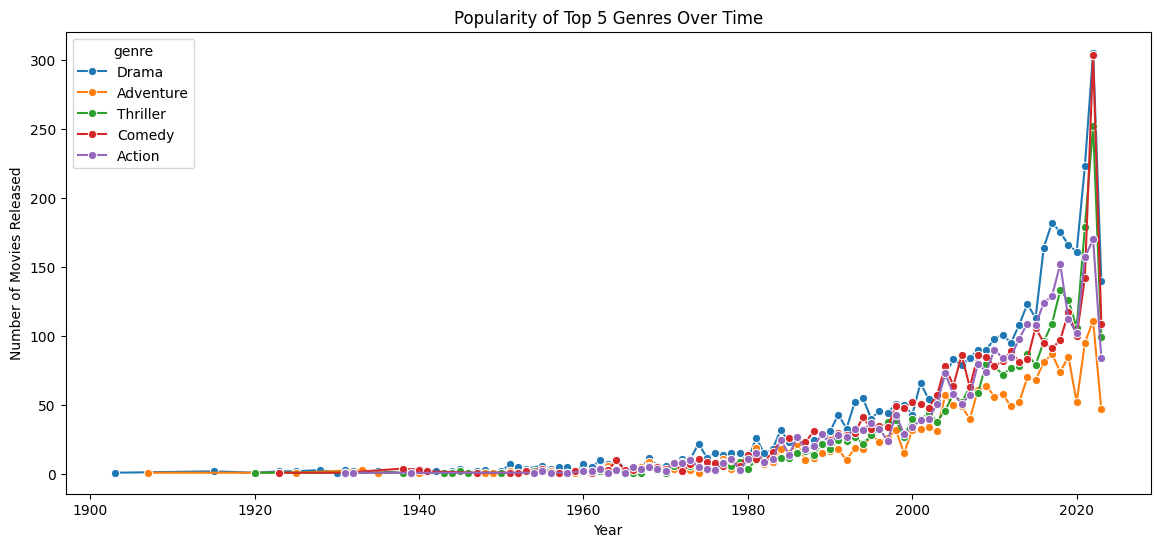

In [149]:
# using a line plot for better visualisation.

plt.figure(figsize = (14,6))
sns.lineplot(data = genre_trend_top, x = "year", y = "count", hue = "genre", marker = "o")
plt.title("Popularity of Top 5 Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.show()

**1. Low Counts Before 1980**
- Most genres saw very few releases before 1980 — under 20 per year — due to the limited global reach of cinema.

**2. Post-1980 Growth Begins**
- Movie production increased notably across all genres in the 1980s and 1990s, with Drama and Comedy starting to lead.

**3. Digital Boom Post-2000**
- After 2000, there’s a steep rise in the number of movies — especially in Drama, Comedy, and Thriller — likely driven by digitization and streaming platforms.

**4. Drama Dominates**
- Drama consistently has the highest number of releases since the 1990s, showing its universal appeal.

**5. Comedy's Comeback**
- Comedy caught up significantly post-2010, briefly rivaling Drama in terms of release volume.

**6. Action & Adventure Rising**
- Action and Adventure saw steady growth, particularly from 2010 onward, aligning with the rise of global blockbuster franchises.

**7. Thriller's Stability**
- Thriller maintained a consistent rise without major fluctuations — a sign of growing audience interest in suspense and mystery.

**8. 2022 Peak**
- Almost all genres reached their highest release counts in 2022, with Drama and Comedy nearing 300 releases each.

**9. 2023–24 Drop**
- A sharp decline in 2023 may point to data incompleteness, production delays, or industry slowdowns.

**10. Genre Explosion Era**
- Overall, the post-2000s mark a period of genre explosion, highlighting how the film industry became more diverse, accessible, and globalized.

### Plot the number of movies released per genre each year.

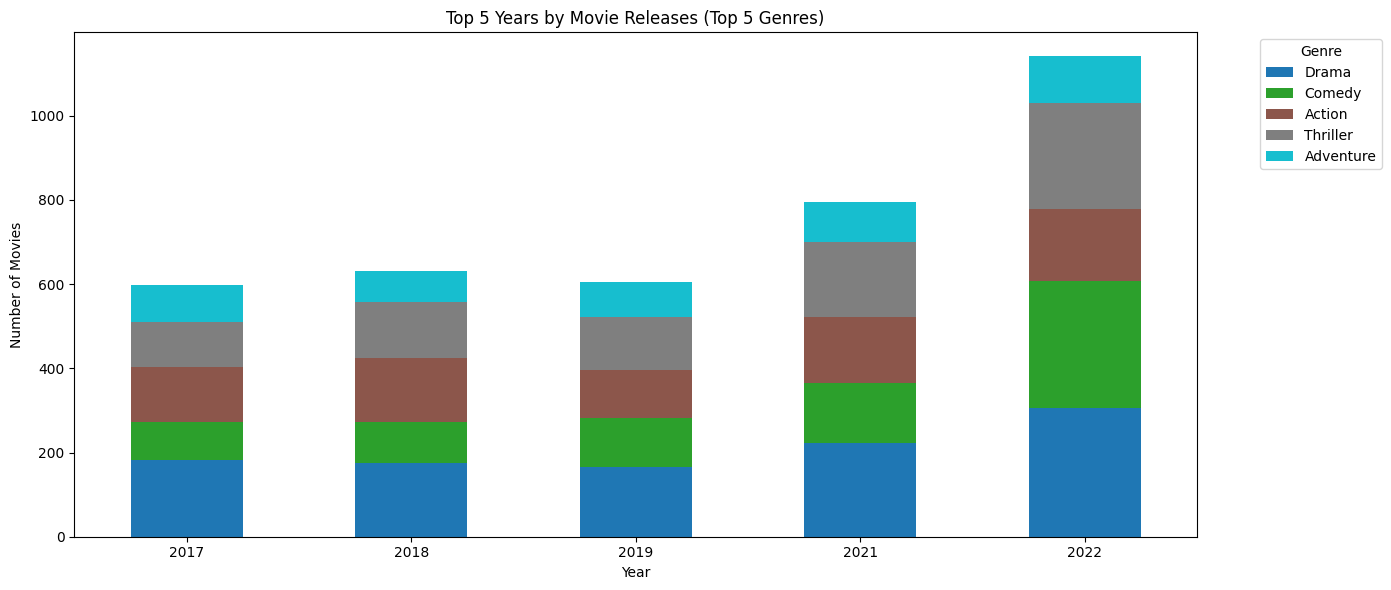

In [150]:
# Pivot the data
pivot_df = genre_trend.pivot(index = "year", columns = "genre", values = "count").fillna(0)

# Limiting to top 5 genres
top_genres = pivot_df.sum().sort_values(ascending = False).head(5).index
pivot_df = pivot_df[top_genres]

# Limiting to top 5 years based on total genre count
top_years = pivot_df.sum(axis = 1).sort_values(ascending = False).head(5).index
pivot_df = pivot_df.loc[top_years]

# Sorting years chronologically
pivot_df = pivot_df.sort_index()

# Plotting as barplot
pivot_df.plot(kind = "bar", stacked = True, figsize = (14, 6), colormap = "tab10")

plt.title("Top 5 Years by Movie Releases (Top 5 Genres)")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation = 0)
plt.legend(title = "Genre", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()


**1. 2022 had the highest total movie releases**, crossing **1100** movies among the selected top 5 genres.

- This might suggest a post-COVID production rebound or increased streaming content.

**2. Drama is consistently the most dominant genre** each year.

- Especially in 2022, it contributed significantly to the total.

**3. Comedy and Thriller gained momentum in 2022**:

- Notably higher compared to 2017–2019.

- Comedy almost doubled in count from 2019 to 2022.

**4. 2019 had the lowest total releases** among these five years, slightly below 2017.

- Likely indicating a dip just before the pandemic hit in 2020.

**5. Adventure movies remained fairly consistent** , contributing a smaller but stable portion across years.

**6. Drop in 2020 is evident by its absence**, implying production delays or data exclusion for that year (likely pandemic impact).

# 7. Year and Trend Analysis

### Which years had the highest and lowest number of movie releases? Plot the number of movies released each year.

In [151]:
# Which years had the highest and lowest number of movie releases? Plot the number of movies released each year.

df["status"].value_counts()

status
Released           10007
Post Production       30
In Production         15
Name: count, dtype: int64

In [152]:
# Filter movies with status = "Released"
released_df = df[df["status"].str.strip().str.lower() == "released"]

# Grouping by year and count
release_per_year = released_df.groupby("year").size().reset_index(name = "released_count")

# Sorting by year
release_per_year = release_per_year.sort_values(by = "year", ascending = False).head(5)
release_per_year

,year,released_count
98,2023,328
97,2022,935
96,2021,618
95,2020,448
94,2019,465


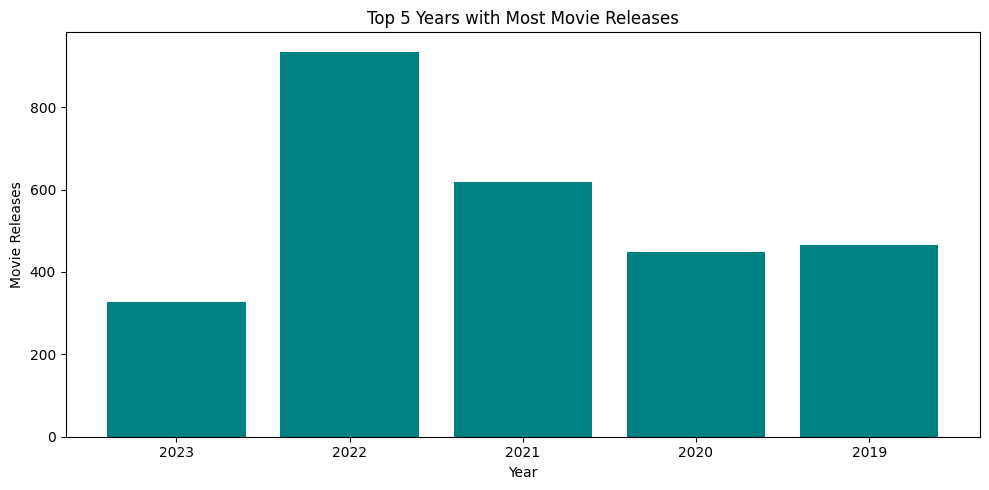

In [153]:
# Sort and get top 5 years by release count
top_5_years = release_per_year.sort_values(by = "year", ascending = False).head(5)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(top_5_years["year"].astype(str), top_5_years["released_count"], color="teal")
plt.title("Top 5 Years with Most Movie Releases")
plt.xlabel("Year")
plt.ylabel("Movie Releases")
plt.tight_layout()
plt.show()

In [154]:
# Filter movies with status = "Released"
released_df = df[df["status"].str.strip().str.lower() == "released"]

# Grouping by year and count
release_per_year = released_df.groupby("year").size().reset_index(name = "released_count")

# Sorting by year
bottom_release_per_year = release_per_year.sort_values(by = "year", ascending = False).tail(5)
bottom_release_per_year

,year,released_count
4,1923,3
3,1920,1
2,1915,2
1,1907,1
0,1903,1


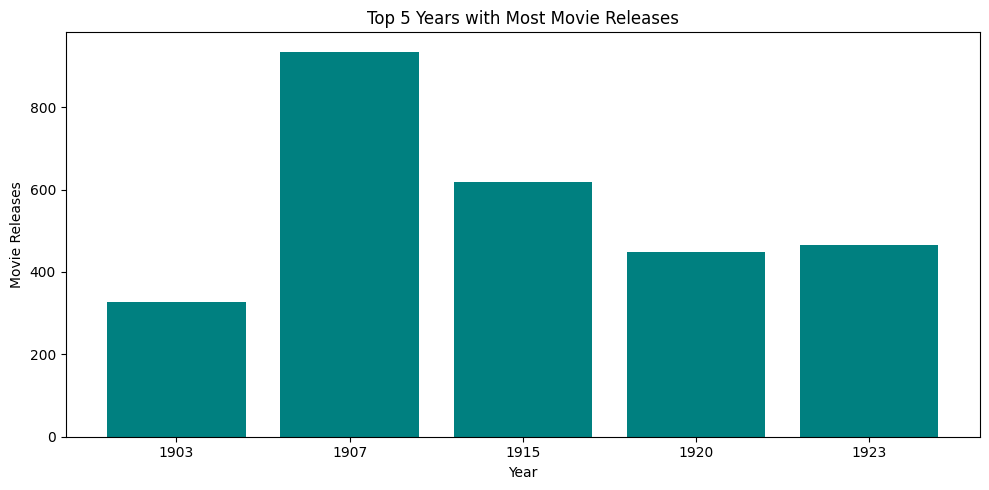

In [155]:
# Sorting by year
bottom_release_per_year = release_per_year.sort_values(by = "year", ascending = False).tail(5)

# Sort and get top 5 years by release count
bottom_5_years = bottom_release_per_year.sort_values(by = "year", ascending = True).tail(5)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(bottom_5_years["year"].astype(str), top_5_years["released_count"], color="teal")
plt.title("Top 5 Years with Most Movie Releases")
plt.xlabel("Year")
plt.ylabel("Movie Releases")
plt.tight_layout()
plt.show()

In [156]:
# In the year 2022 we can see the highest number of movie releases
# In the year 1903 we can see the least number of movie releases.

# 8. Multivariate Analysis: Analyze multiple variables together.

### Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.

In [157]:
year_df = df["year"]
print(year_df.head(5))
print(year_df.tail(5))

0    2023
1    2022
2    2023
3    2023
4    2023
Name: year, dtype: int32
10173    2016
10174    1990
10175    1990
10176    1995
10177    2020
Name: year, dtype: int32


In [158]:
# Keep required columns & drop missing values
genre_decade_df = df[["year", "genre", "score"]].dropna()

# Convert year to int and compute decade
genre_decade_df["year"] = genre_decade_df["year"].astype(int)
genre_decade_df["decade"] = (genre_decade_df["year"] // 10) * 10

# Split multiple genres and clean
genre_decade_df["genre"] = genre_decade_df["genre"].astype(str).str.split(",\s*")
genre_decade_df = genre_decade_df.explode("genre")
genre_decade_df["genre"] = genre_decade_df["genre"].str.strip()

# Group by decade and genre: count + avg_score
genre_stats = genre_decade_df.groupby(["decade", "genre"]).agg(count = ("score", "count"), avg_score=("score", "mean")).reset_index()

# Compute weighted popularity = count × avg_score
genre_stats["popularity"] = genre_stats["count"] * genre_stats["avg_score"]

# Get the top genre per decade based on popularity
top_genres_by_popularity = genre_stats.sort_values("popularity", ascending=False).drop_duplicates("decade")

# Sort result by decade
top_genres_by_popularity = top_genres_by_popularity.sort_values("decade")
top_genres_by_popularity

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BINAY\AppData\Local\Temp\ipykernel_14356\1018501040.py:9: SyntaxWarning: invalid escape sequence '\s'
  genre_decade_df["genre"] = genre_decade_df["genre"].astype(str).str.split(",\s*")


,decade,genre,count,avg_score,popularity
3,1900,Science Fiction,1,80.000000,80.0
4,1910,Drama,2,61.000000,122.0
10,1920,Drama,8,73.625000,589.0
24,1930,Drama,11,76.545455,842.0
39,1940,Drama,20,76.500000,1530.0
55,1950,Drama,39,76.205128,2972.0
72,1960,Drama,68,73.014706,4965.0
91,1970,Drama,130,65.246154,8482.0
109,1980,Drama,215,65.730233,14132.0
128,1990,Drama,445,67.130337,29873.0


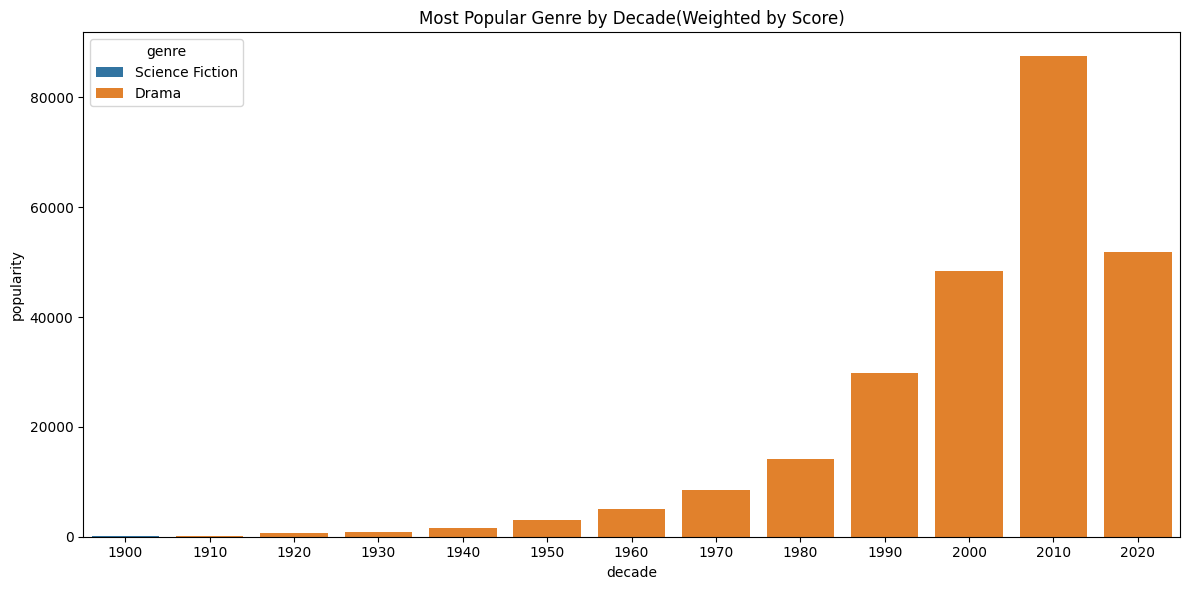

In [159]:
# plotting a bar graph for better visualisation

plt.figure(figsize = (12,6))
sns.barplot(data = top_genres_by_popularity, x = "decade", y = "popularity", hue = "genre")
plt.title("Most Popular Genre by Decade(Weighted by Score)")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [160]:
# Looking at the graph we can see "drama" has the highest popularity among the veiwers where as in 1900s people liked "science fiction".

# 9. Insights and Summary

### Based on your analysis, what are three major insights you learned about movie trends, popular genres, or movie ratings?


**Drama’s Consistent Dominance**
Drama has been the most released genre since the 1990s, reflecting its strong and enduring global appeal.

**Genre Growth Post-2000**
After 2000, all major genres — especially Comedy, Thriller, and Action — saw a sharp rise in releases, driven by digital platforms and global distribution.

**2023 Decline & 2022 Peak**
2022 marked the peak in genre releases, possibly due to a post-COVID backlog, followed by a noticeable dip in 2023, likely due to industry disruptions or incomplete data.

### What additional questions could be explored with this dataset, or what other data would be helpful to gain a deeper understanding?

1. Does release season (month or quarter) affect rating or genre ?
2. Do genres with more releases also get higher average ratings ?
3. How have new or niche genres (like Sci-Fi or Documentary) evolved over time ?